In [10]:
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings('ignore')

# Clustering

In [11]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('catfood_prepared.csv')

# Show general information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            121 non-null    float64
 1   weight           121 non-null    float64
 2   star_rating      121 non-null    float64
 3   total_comments   121 non-null    float64
 4   adult            121 non-null    float64
 5   chicken          121 non-null    float64
 6   wet              121 non-null    float64
 7   from_ocean       121 non-null    float64
 8   company_farmina  121 non-null    int64  
 9   company_me-o     121 non-null    int64  
 10  company_meat     121 non-null    int64  
 11  company_purepet  121 non-null    int64  
 12  company_purina   121 non-null    int64  
 13  company_royal    121 non-null    int64  
 14  company_sheba    121 non-null    int64  
 15  company_whiskas  121 non-null    int64  
dtypes: float64(8), int64(8)
memory usage: 15.2 KB
None


## Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler

# --- Scale the data ---
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## Hierarchical Clustering

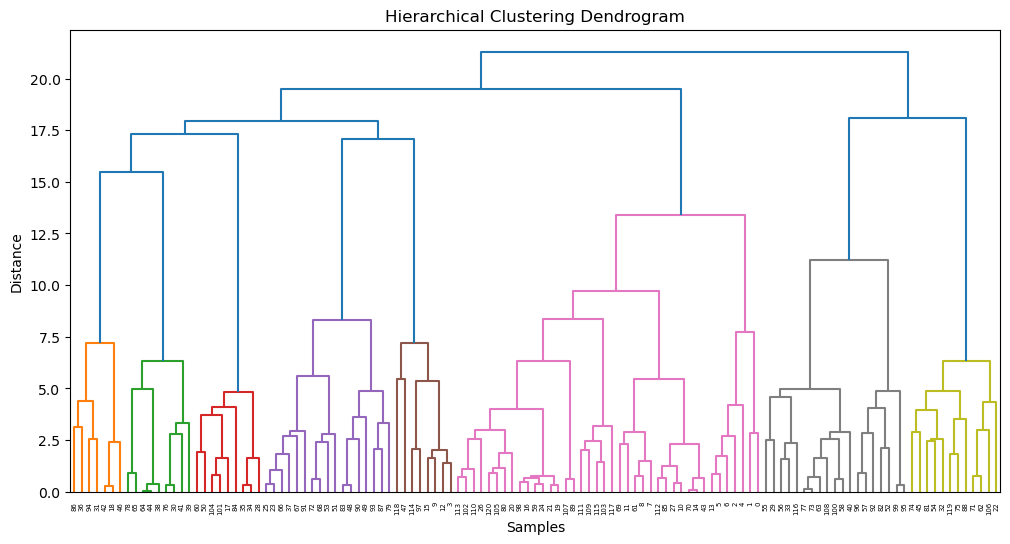

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram

# --- Perform hierarchical clustering ---
linked = linkage(data_scaled, method='ward')  # 'ward' minimizes variance

# --- Plot dendrogram ---
plt.figure(figsize=(12, 6))
dendrogram(linked,
           labels=data.index,  # keeps row indices as labels
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


## K-means

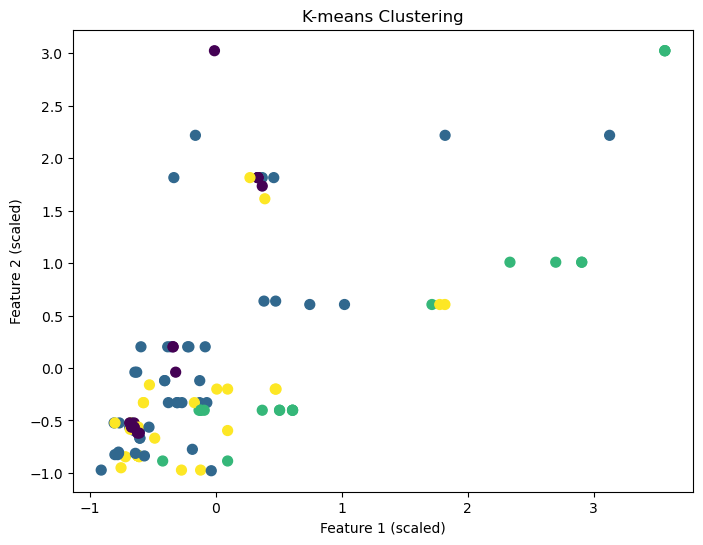

Cluster centers (scaled):
[[-2.84892696e-01  4.04506776e-01 -3.38861633e-01 -3.60751020e-01
  -6.15457455e-02 -4.07748916e-01 -7.11965984e-02 -9.42025602e-04
  -4.31595308e-01  2.31351602e+00 -4.24982567e-02 -2.83473355e-01
  -2.83473355e-01 -3.31800758e-01 -2.83473355e-01 -6.76632341e-01]
 [-2.65302470e-01 -8.54953686e-02  3.55469050e-01  3.23599474e-01
   2.57795387e-01  9.55039751e-03  2.31032122e-01  5.64682139e-01
  -4.31595308e-01 -4.04303770e-01  1.89516426e-01 -1.39656684e-01
  -2.83473355e-01 -3.31800758e-01  2.19884992e-01  8.68132061e-01]
 [ 1.28420632e+00  3.95993043e-01  3.78677875e-01 -3.26408114e-01
   3.44656175e-01  5.42326145e-03  5.07609497e-01 -9.47018338e-01
   2.17955630e+00 -4.04303770e-01 -2.66076042e-01 -2.83473355e-01
  -2.83473355e-01 -1.64517876e-01 -2.83473355e-01 -6.76632341e-01]
 [-2.16500898e-01 -3.55657610e-01 -6.77130259e-01 -1.37636384e-01
  -6.48281852e-01  2.24161473e-01 -7.03845122e-01 -3.65694339e-01
  -4.31595308e-01 -4.04303770e-01 -1.31929371e-

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Run KMeans with, for example, 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to your DataFrame
data['Cluster'] = clusters

# Plot two features just for visualization (choose any two)
plt.figure(figsize=(8,6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("K-means Clustering")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

# Optional: check cluster centers
print("Cluster centers (scaled):")
print(kmeans.cluster_centers_)